In [ ]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

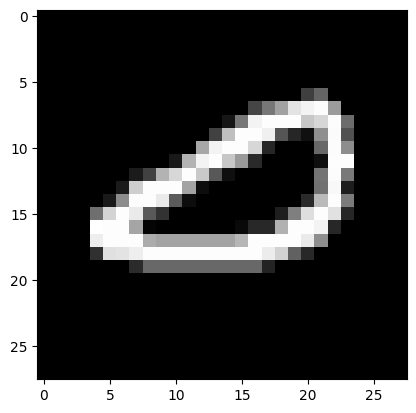

In [ ]:
#randomly select input image
index = np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test[index].reshape(28, 28))
plt.show()

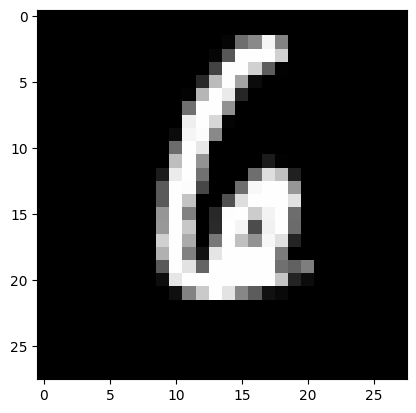

In [ ]:
#randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

In [ ]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')

])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

In [ ]:
# train the  model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 124s 522ms/step - loss: 0.1754 - val_loss: 0.0881
Epoch 2/20
235/235 [==============================] - 133s 567ms/step - loss: 0.0837 - val_loss: 0.0793
Epoch 3/20
235/235 [==============================] - 127s 541ms/step - loss: 0.0784 - val_loss: 0.0761
Epoch 4/20
235/235 [==============================] - 171s 729ms/step - loss: 0.0760 - val_loss: 0.0743
Epoch 5/20
235/235 [==============================] - 166s 707ms/step - loss: 0.0745 - val_loss: 0.0731
Epoch 6/20
235/235 [==============================] - 129s 548ms/step - loss: 0.0734 - val_loss: 0.0723
Epoch 7/20
235/235 [==============================] - 109s 461ms/step - loss: 0.0726 - val_loss: 0.0715
Epoch 8/20
235/235 [==============================] - 103s 436ms/step - loss: 0.0719 - val_loss: 0.0710
Epoch 9/20
235/235 [==============================] - 118s 502ms/step - loss: 0.0714 - val_loss: 0.0706
Epoch 10/20
235/235 [==============================] - 113s 483m

In [ ]:
#predict the results from model (get compressed image)
pred = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


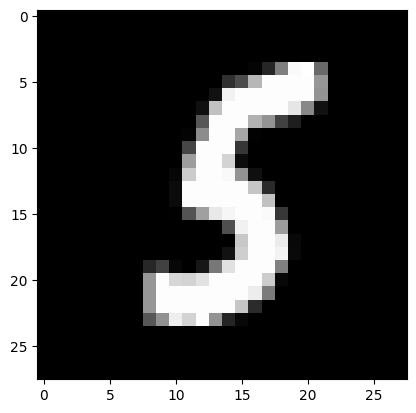

In [ ]:
#randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

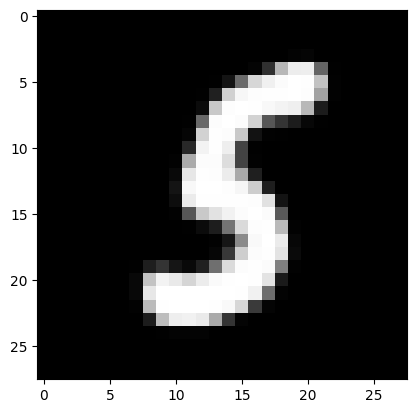

In [ ]:
# visualize compressed image
plt.imshow(pred[index].reshape(28, 28))
plt.gray()

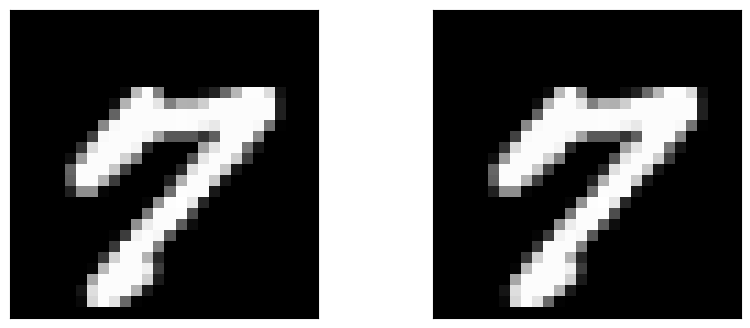

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()
